In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
# importing dataset
digits = datasets.load_digits()

print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
# Display the keys of the digits dataset
print("Keys of the digits dataset:", digits.keys())

# Display the data (features) of the digits dataset
print("\nData of the digits dataset (first rows):\n", digits.data[:1])

# Display the target (labels) of the digits dataset
print("\nTarget of the digits dataset (first elements):\n", digits.target[:1])

Keys of the digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Data of the digits dataset (first 5 rows):
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]

Target of the digits dataset (first 5 elements):
 [0]


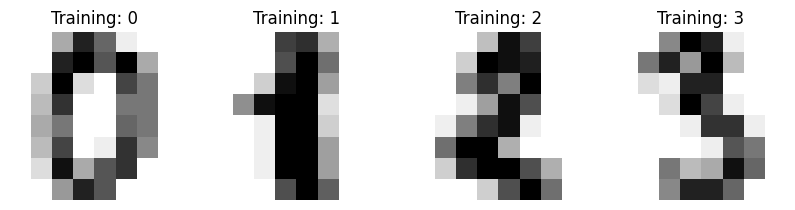

In [4]:
# If using nrows=1, ncols=4 — axes is 1D, no flattening needed
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

for ax, image, label in zip(axes, digits.images[:4], digits.target[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training: {label}')

plt.show()


In [10]:
print("shape and size of the dataset", digits.data.shape)
print("shape and size of the images", digits.images.shape)
print("size of images", len(digits.images))


shape and size of the dataset (1797, 64)
shape and size of the images (1797, 8, 8)
size of images 1797


In [14]:
#to apply classifier model for this data set we need to flatten the 2-D images
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)


#creating a classifier a support vector classifier
classifier = svm.SVC(gamma=0.001)

#splitting the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

#training the model
classifier.fit(x_train, y_train)

#predicting the values of the digits on the test subset
predicted = classifier.predict(x_test)

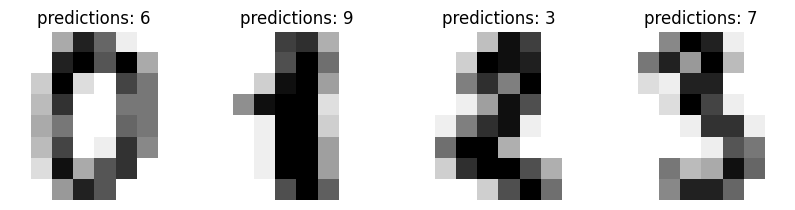

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

for ax, image, prediction in zip(axes, digits.images[:4], predicted):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'predictions: {prediction}')

plt.show()

In [21]:
print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


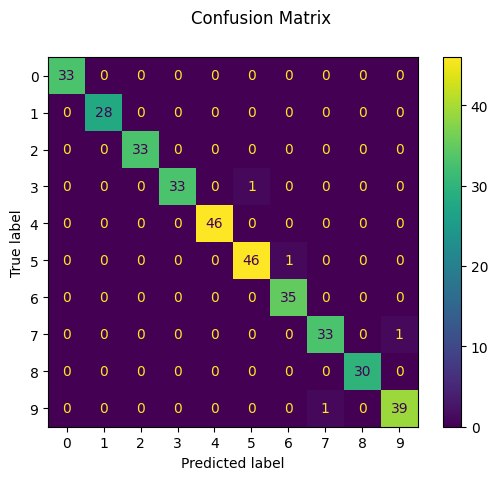

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()